In [2]:
from sklearn import metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('redwine.csv')
df.head()
print(df.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


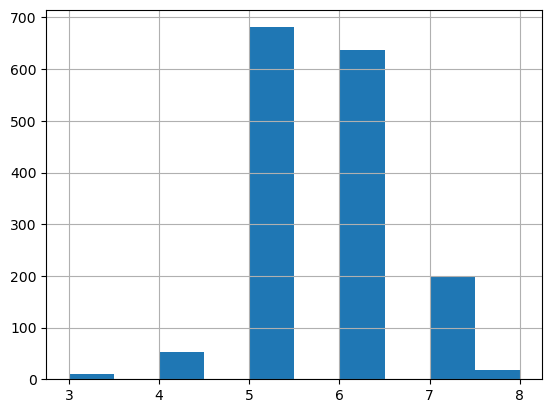

In [52]:
df['quality'].hist()
df


In [5]:
x= df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df[['quality']]

In [22]:
scaler= preprocessing.StandardScaler()
x = scaler.fit(x).transform(x.astype(float))


In [47]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.4,random_state=42)
y_train = y_train.astype(int) 
y_test = y_test.astype(int)

In [48]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train,y_train.ravel())
yhat = neigh.predict(x_test)

In [49]:
acc_train = metrics.accuracy_score(y_train , neigh.predict(x_train))
acc_test = metrics.accuracy_score(y_test , neigh.predict(x_test))
print(acc_train)
print(acc_test)

0.9499478623566214
0.9390625


In [50]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/media/aria/SSD/anaconda/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/media/aria/SSD/anaconda/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/media/aria/SSD/anaconda/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/media/aria/SSD/anaconda/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expe

array([0.91875  , 0.90625  , 0.940625 , 0.9390625, 0.946875 , 0.946875 ,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375, 0.9484375,
       0.9484375, 0.9484375, 0.9484375, 0.9484375, 

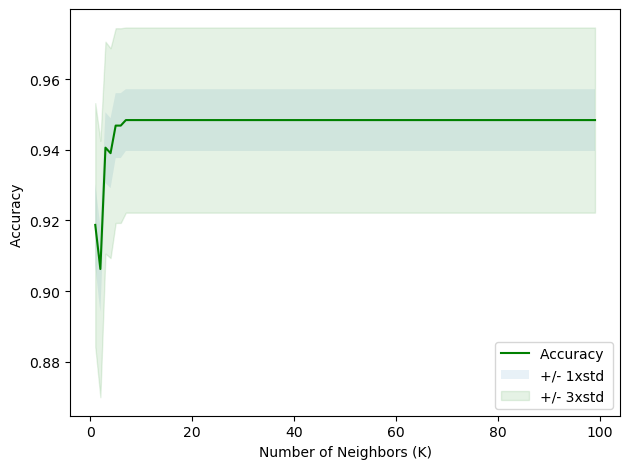

In [51]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()